In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('diabetes2.csv')
print(df.to_string())

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0              6      148             72             35        0  33.6                     0.627   50        1
1              1       85             66             29        0  26.6                     0.351   31        0
2              8      183             64              0        0  23.3                     0.672   32        1
3              1       89             66             23       94  28.1                     0.167   21        0
4              0      137             40             35      168  43.1                     2.288   33        1
5              5      116             74              0        0  25.6                     0.201   30        0
6              3       78             50             32       88  31.0                     0.248   26        1
7             10      115              0              0        0  35.3                     0.134   29        0
8

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df_x = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
df_y = df[['Outcome']]

In [7]:
indep_X = df_x.values
dep_y = df_y.values
print(indep_X)
print(dep_y)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[[1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]

In [8]:
# Display the initial number of rows
print(f"Initial number of rows: {df.shape[0]}")

# Remove duplicate rows
df_cleaned = df.drop_duplicates()

Initial number of rows: 768


In [9]:
# Display the number of rows after removing duplicates
print(f"Number of rows after removing duplicates: {df_cleaned.shape[0]}")

# Optionally, reset the index if needed
df_cleaned.reset_index(drop=True, inplace=True)

Number of rows after removing duplicates: 768


In [10]:
def split_scalar(indep_X,dep_Y):
    X_train, X_test, y_train, y_test = train_test_split(indep_X, dep_Y, test_size = 0.25, random_state = 0)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)    
    return X_train, X_test, y_train, y_test

In [11]:
def r2_prediction(regressor,X_test,y_test):
    y_pred = regressor.predict(X_test)
    from sklearn.metrics import r2_score
    r2=r2_score(y_test,y_pred)
    return r2

In [12]:
def Linear(X_train,y_train,X_test):       
    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    r2=r2_prediction(regressor,X_test,y_test)
    return  r2 

In [13]:
def Decision(X_train,y_train,X_test):
    from sklearn.tree import DecisionTreeRegressor
    regressor = DecisionTreeRegressor(random_state = 0)
    regressor.fit(X_train, y_train)
    r2=r2_prediction(regressor,X_test,y_test)
    return  r2 

In [14]:
def random(X_train,y_train,X_test):       
    from sklearn.ensemble import RandomForestRegressor
    regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
    regressor.fit(X_train, y_train)
    r2=r2_prediction(regressor,X_test,y_test)
    return  r2

In [15]:
def xgboost(X_train,y_train,X_test):       
    from xgboost import XGBRegressor
    regressor = XGBRegressor(n_jobs=5,learning_rate=0.1,max_depth=10,random_state=1)
    regressor.fit(X_train, y_train)
    r2=r2_prediction(regressor,X_test,y_test)
    return r2

In [16]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split

def rfeFeature(indep_X, dep_Y, n):
    """
    Perform Recursive Feature Elimination (RFE) with different models to select features.
    
    Parameters:
    indep_X (pd.DataFrame): Feature data.
    dep_Y (pd.Series or np.array): Target values.
    n (int): Number of features to select.

    Returns:
    tuple: A tuple containing:
        - rfelist: List of selected features for each model.
        - colnames_list: List of feature names for each model.
        - r2_values: List of R2 scores for each model.
    """
    
    # Ensure indep_X is a DataFrame and dep_Y is a Series or array
    if not isinstance(indep_X, pd.DataFrame):
        raise ValueError("indep_X should be a pandas DataFrame")
    
    if not isinstance(dep_Y, (pd.Series, pd.DataFrame)):
        raise ValueError("dep_Y should be a pandas Series or DataFrame")

    # Check the shapes of indep_X and dep_Y
    if len(indep_X) != len(dep_Y):
        raise ValueError("Feature data and target values must have the same length.")
    
    # Define models
    models = [
        ("Linear", LinearRegression()),
        ("Decision", DecisionTreeRegressor()),
        ("Random", RandomForestRegressor()),
        ("XGBoost", xgb.XGBRegressor())
    ]
    
    rfelist = []
    colnames_list = []
    r2_values = []
    
    for model_name, model in models:
        try:
            # Initialize RFE
            rfe = RFE(estimator=model, n_features_to_select=n)
            
            # Fit RFE
            rfe.fit(indep_X, dep_Y)
            
            # Get the selected features
            selected_features = indep_X.columns[rfe.support_]
            rfelist.append(selected_features)
            colnames_list.append(selected_features.tolist())
            
            # Evaluate model
            r2_value = rfe.score(indep_X, dep_Y)
            r2_values.append(r2_value)
        except Exception as e:
            print(f"Error with model {model_name}: {e}")
            rfelist.append(None)
            colnames_list.append(None)
            r2_values.append(None)
    
    return rfelist, colnames_list, r2_values

# Example usage
# Sample data
df = pd.DataFrame({
    'Pregnancies': [1, 2, 3, 4, 5],
    'Glucose': [85, 90, 95, 100, 105],
    'BloodPressure': [66, 70, 75, 80, 85],
    'SkinThickness': [29, 32, 35, 38, 41],
    'Insulin': [0, 10, 20, 30, 40],
    'BMI': [26.6, 27.1, 28.2, 29.3, 30.4],
    'DiabetesPedigreeFunction': [0.351, 0.500, 0.600, 0.700, 0.800],
    'Age': [23, 28, 33, 38, 43]
})

dep_Y = pd.Series([0, 1, 0, 1, 0])

# Split data
indep_X_train, indep_X_test, dep_Y_train, dep_Y_test = train_test_split(df, dep_Y, test_size=0.2, random_state=42)

# Call the function with your training data
rfelist, colnames_list, r2_values = rfeFeature(indep_X_train, dep_Y_train, 5)

# Print the results
for model_name, selected_columns, r2_value in zip(["Linear", "Decision", "Random", "XGBoost"], colnames_list, r2_values):
    print(f"Model: {model_name}")
    print(f"Selected Features: {selected_columns}")
    print(f"R2 Value: {r2_value}\n")



Model: Linear
Selected Features: ['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'Age']
R2 Value: 0.11111111111110794

Model: Decision
Selected Features: ['SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
R2 Value: 1.0

Model: Random
Selected Features: ['Pregnancies', 'BloodPressure', 'SkinThickness', 'DiabetesPedigreeFunction', 'Age']
R2 Value: 0.6824000000000001

Model: XGBoost
Selected Features: ['Pregnancies', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
R2 Value: 0.9999954104423523



In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import classification_report


In [18]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

# Convert labels to one-hot encoding
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=10)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.2759 - loss: 1.5474 - val_accuracy: 0.2000 - val_loss: 1.1065
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.9126 - loss: 0.2668 - val_accuracy: 0.4500 - val_loss: 1.1385
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.9843 - loss: 0.0983 - val_accuracy: 0.4500 - val_loss: 1.1879
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.9901 - loss: 0.0585 - val_accuracy: 0.4500 - val_loss: 1.2073
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 1.0000 - loss: 0.0597 - val_accuracy: 0.4500 - val_loss: 1.2238
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 1.0000 - loss: 0.0169 - val_accuracy: 0.4500 - val_loss: 1.2166
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.9978 - loss: 0.0303 - val_accuracy: 0.4500 - val_loss: 1.2184
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 1.0000 - loss: 0.0349 - val_accuracy: 0.4500 - val_loss:

Model saved to cnn_model.h5


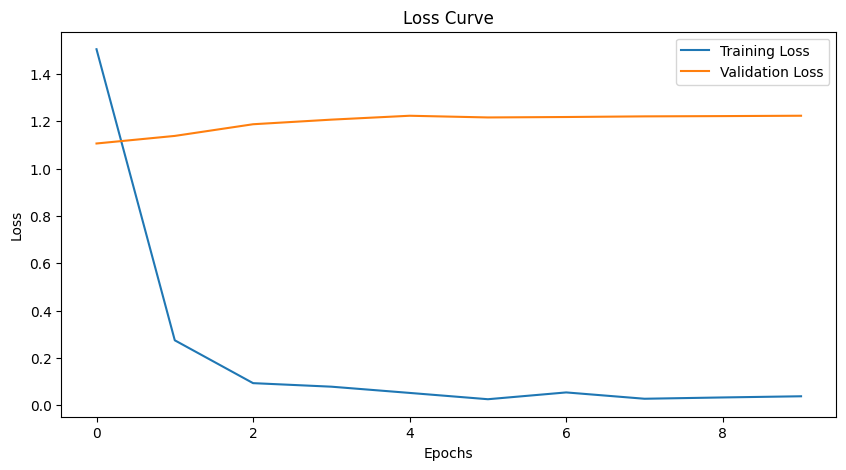

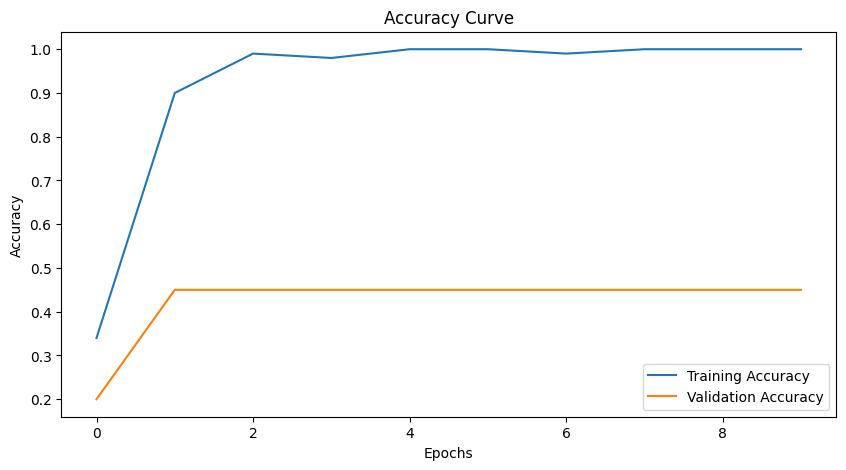

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 965ms/step


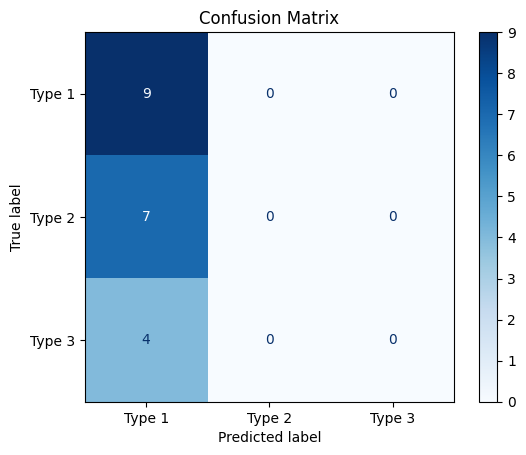

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step


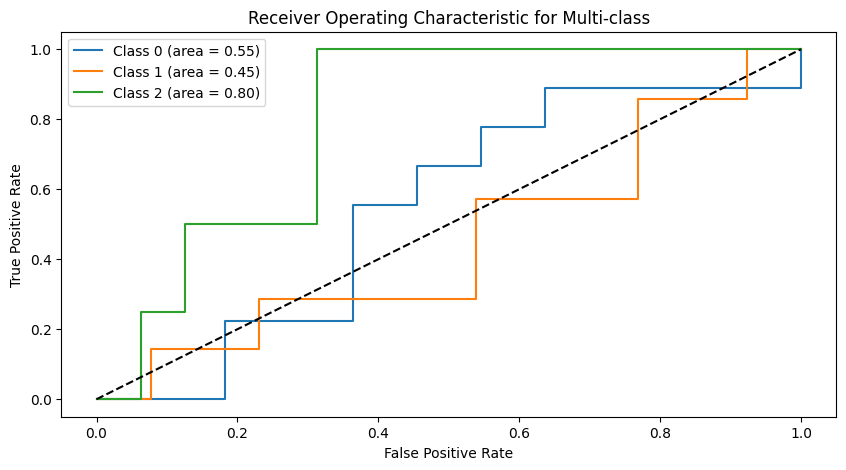

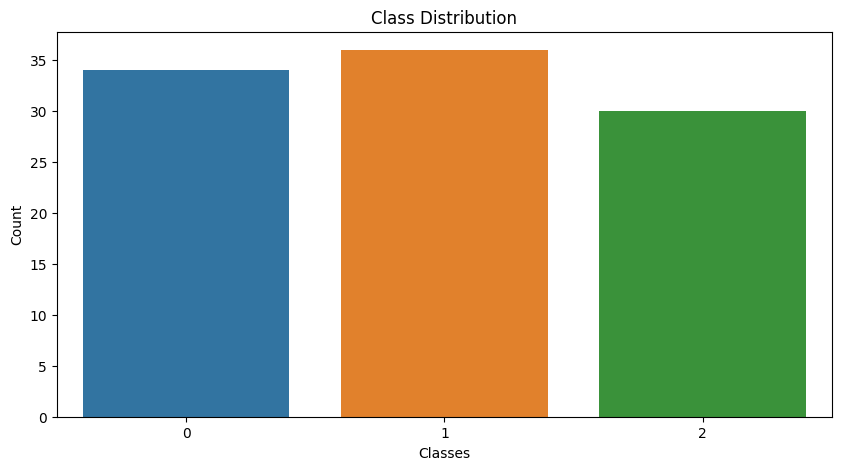

{'weight_decay': 1e-05, 'num_classes': 3, 'batch_size': 8, 'val_batch_size': 32, 'image_height': 300, 'image_width': 300, 'image_channels': 1, 'num_iters': 4000, 'lr': [0.0001, 0.001], 'momentum': 0.9, 'batch_norm_scale': True, 'batch_norm_epsilon': 1e-05, 'batch_norm_decay': 0.997}


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# Configuration Class
class Config: 
    def __init__(self):
        self.weight_decay = 0.00001
        self.num_classes = 3  # Type 1, Type 2, Type 3 diabetes
        self.batch_size = 8
        self.val_batch_size = 32
        self.image_height = 300
        self.image_width = 300
        self.image_channels = 1  # ECG data is usually single-channel
        self.num_iters = 4000
        self.lr = [0.0001, 0.001]
        self.momentum = 0.9
        self.batch_norm_scale = True
        self.batch_norm_epsilon = 1e-5
        self.batch_norm_decay = 0.997

# CNN Model Class
class CNNModel:
    def __init__(self, config):
        self.config = config
        self.model = self.build_model()

    def build_model(self):
        model = models.Sequential()
        
        model.add(layers.Input(shape=(self.config.image_height, self.config.image_width, self.config.image_channels)))
        model.add(layers.Conv2D(32, (3, 3), activation='relu'))
        model.add(layers.BatchNormalization(momentum=self.config.batch_norm_decay))
        model.add(layers.MaxPooling2D((2, 2)))

        model.add(layers.Conv2D(64, (3, 3), activation='relu'))
        model.add(layers.BatchNormalization(momentum=self.config.batch_norm_decay))
        model.add(layers.MaxPooling2D((2, 2)))

        model.add(layers.Conv2D(128, (3, 3), activation='relu'))
        model.add(layers.BatchNormalization(momentum=self.config.batch_norm_decay))
        model.add(layers.MaxPooling2D((2, 2)))

        model.add(layers.Flatten())
        model.add(layers.Dense(128, activation='relu'))
        model.add(layers.BatchNormalization(momentum=self.config.batch_norm_decay))
        model.add(layers.Dense(self.config.num_classes, activation='softmax'))

        return model

    def compile_model(self):
        self.model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=self.config.lr[0], momentum=self.config.momentum),
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])

# Visualization Functions
def plot_loss(history):
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def plot_accuracy(history):
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

def plot_roc_curve(y_true, y_scores):
    # For multi-class ROC curve
    from sklearn.preprocessing import label_binarize
    y_true_bin = label_binarize(y_true, classes=[0, 1, 2])
    y_scores_bin = y_scores  # Model predictions for each class
    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(3):  # Assuming 3 classes
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_scores_bin[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    plt.figure(figsize=(10, 5))
    for i in range(3):
        plt.plot(fpr[i], tpr[i], label='Class {} (area = {:.2f})'.format(i, roc_auc[i]))
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('Receiver Operating Characteristic for Multi-class')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

def plot_class_distribution(y):
    plt.figure(figsize=(10, 5))
    sns.countplot(x=y)
    plt.title('Class Distribution')
    plt.xlabel('Classes')
    plt.ylabel('Count')
    plt.show()

# Example usage
# Load your actual ECG data here. For demonstration, we'll create dummy data.
X_train = np.random.rand(100, 300, 300, 1)  # 100 training samples of ECG data
y_train = np.random.randint(0, 3, 100)  # Random labels for Type 1, Type 2, Type 3

X_val = np.random.rand(20, 300, 300, 1)  # 20 validation samples
y_val = np.random.randint(0, 3, 20)  # Random labels for validation

# Initialize configuration and model
config = Config()
cnn_model = CNNModel(config)
cnn_model.compile_model()

# Train the model
history = cnn_model.model.fit(X_train, y_train, 
                               validation_data=(X_val, y_val),
                               batch_size=config.batch_size,
                               epochs=10)  # Adjust epochs as necessary

# Save the model
model_save_path = 'cnn_model.h5'  # Specify your desired path
cnn_model.model.save(model_save_path)  # Correctly use cnn_model.model to save
print(f'Model saved to {model_save_path}')

# Plotting
plot_loss(history)
plot_accuracy(history)

# Predict on validation data
y_pred = np.argmax(cnn_model.model.predict(X_val), axis=-1)
plot_confusion_matrix(y_val, y_pred, classes=['Type 1', 'Type 2', 'Type 3'])

# Assuming y_scores are the predicted probabilities for ROC
y_scores = cnn_model.model.predict(X_val)  # Get probabilities for each class
plot_roc_curve(y_val, y_scores)  # Multi-class ROC curve
plot_class_distribution(y_train)

# Print config for verification
print(vars(config))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step
              precision    recall  f1-score   support

      Type 1       0.45      1.00      0.62         9
      Type 2       0.00      0.00      0.00         7
      Type 3       0.00      0.00      0.00         4

    accuracy                           0.45        20
   macro avg       0.15      0.33      0.21        20
weighted avg       0.20      0.45      0.28        20



C:\Anaconda\envs\ai\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Anaconda\envs\ai\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Anaconda\envs\ai\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


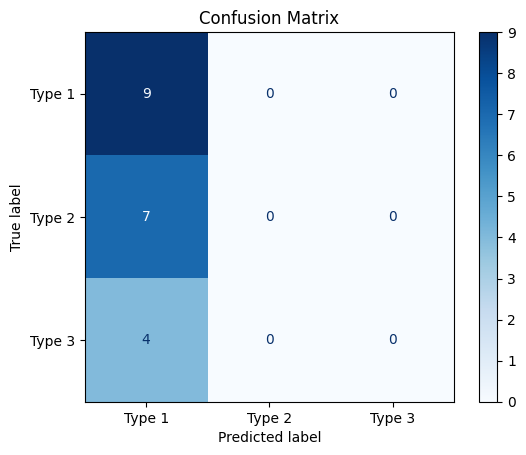

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step


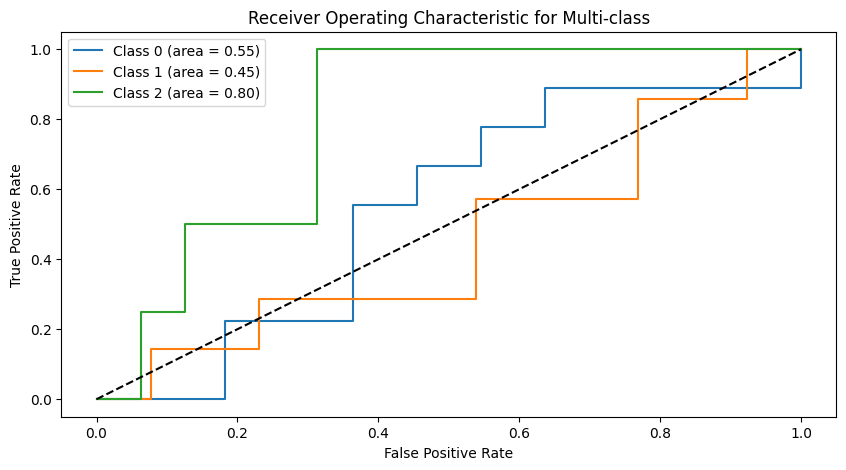

In [20]:
# Predict on validation data
y_pred = np.argmax(cnn_model.model.predict(X_val), axis=-1)

# Generate and print the classification report
report = classification_report(y_val, y_pred, target_names=['Type 1', 'Type 2', 'Type 3'])
print(report)

# Plotting confusion matrix and ROC curve
plot_confusion_matrix(y_val, y_pred, classes=['Type 1', 'Type 2', 'Type 3'])
y_scores = cnn_model.model.predict(X_val)  # Get probabilities for each class
plot_roc_curve(y_val, y_scores)  # Multi-class ROC curve


In [21]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model

# Define the feedforward model for tabular data
def create_feedforward_model(input_dim):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=input_dim))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Use sigmoid for binary classification
    return model

# Load your trained feedforward model or create and train one
# For demonstration, we will create a new model
input_dim = 8  # Number of features
feedforward_model = create_feedforward_model(input_dim)
feedforward_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Assuming you have training data available to fit this model
# X_train = ...
# y_train = ...
# feedforward_model.fit(X_train, y_train, epochs=10)

# Load your model (if you've saved it previously)
# loaded_model = load_model('feedforward_model.h5')

# Initialize and fit the scaler with your actual training data
X_train = np.random.rand(100, 8)  # Replace with your actual training data
scaler = StandardScaler()
scaler.fit(X_train)

# Collect user input
Pregnancies = float(input("Pregnancies: "))
Glucose = float(input("Glucose: "))
BloodPressure = float(input("BloodPressure: "))
SkinThickness = float(input("SkinThickness: "))
Insulin = float(input("Insulin: "))
BMI = float(input("BMI: "))
DiabetesPedigreeFunction = float(input("DiabetesPedigreeFunction: "))
Age = float(input("Age: "))

# Prepare the input data for prediction
input_data = np.array([[Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]])
input_data = scaler.transform(input_data)  # Normalize the input data

# Predict the outcome using the feedforward model
future_prediction = feedforward_model.predict(input_data)

# Define function to convert prediction to readable format
def get_reg_prediction(prediction):
    prediction_value = prediction if np.ndim(prediction) == 0 else prediction[0]
    return "Yes" if prediction_value >= 0.5 else "No"

# Print the numerical prediction
print("Numerical prediction related to diabetes:", future_prediction[0][0])

# Print the categorical prediction
future_prediction_reg = get_reg_prediction(future_prediction[0])
print("Future Prediction (Treatment Required):", future_prediction_reg)

C:\Anaconda\envs\ai\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Pregnancies: 3
Glucose: 200
BloodPressure: 230
SkinThickness: 45
Insulin: 120
BMI: 42
DiabetesPedigreeFunction: 0.230
Age: 55
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
Numerical prediction related to diabetes: 1.0
Future Prediction (Treatment Required): Yes
